<a href="https://colab.research.google.com/github/JesusESD/ProyectoAPIT/blob/main/Procesamiento_Textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Análisis y Procesamiento Inteligente de Textos

- Manzanares Peña Jorge Luis
- Salazar Domínguez Jesús Eduardo
- Salinas Romero Daniel
- Shen Shuai

Fuente Dataset:
- https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?select=train.csv

IDs de las categorías de noticias:
- 0: Internacionales
- 1: Deportes
- 2: Negocios
- 3: Ciencia y Tecnología


## 1.- Preprocesamiento

In [1]:
import pandas as pd

In [2]:
!wget -O test.csv   https://raw.githubusercontent.com/JesusESD/ProyectoAPIT/main/Data/test.csv
!wget -O train.csv  https://raw.githubusercontent.com/JesusESD/ProyectoAPIT/main/Data/train.csv 
!wget -O val.csv    https://raw.githubusercontent.com/JesusESD/ProyectoAPIT/main/Data/val.csv

--2023-05-31 16:46:31--  https://raw.githubusercontent.com/JesusESD/ProyectoAPIT/main/Data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1831783 (1.7M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.75M  --.-KB/s    in 0.07s   

2023-05-31 16:46:32 (25.9 MB/s) - ‘test.csv’ saved [1831783/1831783]

--2023-05-31 16:46:32--  https://raw.githubusercontent.com/JesusESD/ProyectoAPIT/main/Data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27234338 (26M) [text/plain]
Saving to

In [3]:
test_df  = pd.read_csv('test.csv')  
train_df = pd.read_csv('train.csv')  
val_df   = pd.read_csv('val.csv')  

In [4]:
train_df.head()

,Class,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
val_df.head()

,Class,Title,Description
0,3,Permira links with Apollo to join Toys #39;R ...,"Permira, the private equity firm that owns New..."
1,3,3Com to buy TippingPoint for \$430M,"DECEMBER 13, 2004 (IDG NEWS SERVICE) - 3Com Co..."
2,3,Icahn Files Suit vs. Mylan Laboratories,Billionaire investor Carl Icahn filed a federa...
3,3,Fiat dismisses GM threat that car unit might g...,Fiat threw down the gauntlet to General Motors...
4,4,NASA: Mondays The Best Time To See Geminid Met...,Stargazers can catch a spectacular sight if th...


In [6]:
test_df.head()

,Class,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


- Elimina duplicados

In [7]:
train_df = train_df.drop_duplicates(subset=['Description'])
val_df = val_df.drop_duplicates(subset=['Description'])
test_df = test_df.drop_duplicates(subset=['Description'])

- Ordenamiento de registros

In [8]:
train_df.sort_values(by='Description', ascending=True, inplace=False)

,Class,Title,Description
38968,2,The Rundown,1 Southern California at Stanford &lt;em&...
83160,1,WorldCom Investors Settle,A federal judge approved a \$2.575 billion ...
54379,3,"Johnson Controls Sees Revenue, Earns Up",CHICAGO (Reuters) - Auto parts supplier Joh...
58997,1,Japan's Wide Role in Afghanistan,"Japan's Foreign Ministry spokesman, Hats..."
104138,4,Chip Sales Rise 1.5 Pct in October from September,NEW YORK (Reuters) - Worldwide semiconducto...
...,...,...,...
17055,1,Malaysia court overturns Anwar sodomy ruling,"years in jail, overturning his conviction for ..."
12762,3,Drug to Help Avert Blindness Moves Closer to A...,yetech Pharmaceuticals #39; drug to treat the ...
19295,2,No. 25 Purdue Opens With a 51-0 Rout of Syracuse,yle Orton passed for 287 yards and a career-hi...
2979,2,American Cyclist Hamilton Wins Time Trial,yler Hamilton and Bobby Julich showed that the...


In [9]:
val_df.sort_values(by='Description', ascending=True, inplace=False)

,Class,Title,Description
6240,3,An Optimistic Hiring Forecast,Chief executives in the Washington-Baltimor...
2100,3,LATEST FUTURES NEWS,2004-12-15 11:01:48 Oil - Brent higher on US...
5378,1,Dangers on the Ground in Iraq Lead to Increase...,"AL UDEID AIR BASE, Qatar, Dec. 11 -- In an e..."
2543,4,A Push to Restrict Sales of Video Games,CHICAGO. Dec. 15 -- Decrying violence in fas...
1394,1,"Turkish Engineer, 2 Aides Missing in Afghanistan","KABUL, Afghanistan, Dec. 14 -- A Turkish eng..."
...,...,...,...
322,4,Sprint's Planned Nextel Deal Builds on Wireles...,washingtonpost.com - When Gary D. Forsee took ...
1126,3,"For Sprint and Nextel, the Struggle Is Ahead",which could come as early as today - they will...
4659,3,Consumer prices in US edge higher,which jumped steeply the previous month - incr...
4374,4,Zafi.D Infects 1 in 10 E-mails,which spreads through e-mail that appears to c...


In [10]:
test_df.sort_values(by='Description', ascending=True, inplace=False)

,Class,Title,Description
4562,3,Consumer Confidence Hits 7-Month Low,NEW YORK (Reuters) - U.S. consumers turned m...
6698,1,Terms of Endearment,"Seems that the Bush administration, unlike p..."
6465,1,Forecast Frosty for U.S.-Canadian Ties,TORONTO -- The weather won't be the only thi...
170,4,10 features for a perfect browser,There are some great browsers out there. ...
5775,3,SEC Charges Hollinger's Black with Fraud,WASHINGTON (Reuters) - U.S. regulators filed...
...,...,...,...
7135,3,The relief of shedding a big ball and chain: H...,"which owns fund manager Henderson, - yesterday..."
3116,4,OPM Delving Deeper Into Employees #39; Backgro...,which sets hiring and employment standards for...
4996,2,Diva gallops into history,"wind, water and Makybe Diva -ll came together ..."
7132,1,Plant a tree at Easter urges Nobel laureate,world to plant trees at Easter as a symbol of ...


In [11]:
train_df.loc[4000].Description

'Reuters - A federal appeals court on Thursday\\delivered a stinging blow to the anti-piracy efforts of major\\movie studios and music companies by ruling several Internet\\file-sharing software companies are not liable for copyright\\infringement.'

In [12]:
val_df.loc[4000].Description

'HERZLIYA, Israel An adviser to Israeli Prime Minister Ariel Sharon says a final vote on his planned pullout from Gaza and four West Bank communities could take place months sooner.'

In [13]:
test_df.loc[4000].Description

'Google has announced a new desktop search application that enables users to search their e-mail, files, web history, and chats. Perhaps learning from previous mistakes, Google says it has designed the product  quot;from the ground up to respect user privacy.'

- Elimina cadenas de espacios

In [14]:
train_df = train_df[train_df['Description'].str.strip() != '']
train_df

,Class,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
112395,3,Airbus owners approve A350 to compete with Boe...,The owners of Airbus approved the launch of a ...
112396,3,Van Der Moolen Specialists CEO Retires,Dutch investment firm Van der Moolen Holding N...
112397,4,Cisco Buys Network Design Firm For \$34 Million,BCN Systems #39; routing architecture will be ...
112398,2,Players offer to slash 24 from salaries,The NHL Players #39; Association handed the NH...


In [15]:
val_df = val_df[val_df['Description'].str.strip() != '']
val_df

,Class,Title,Description
0,3,Permira links with Apollo to join Toys #39;R ...,"Permira, the private equity firm that owns New..."
1,3,3Com to buy TippingPoint for \$430M,"DECEMBER 13, 2004 (IDG NEWS SERVICE) - 3Com Co..."
2,3,Icahn Files Suit vs. Mylan Laboratories,Billionaire investor Carl Icahn filed a federa...
3,3,Fiat dismisses GM threat that car unit might g...,Fiat threw down the gauntlet to General Motors...
4,4,NASA: Mondays The Best Time To See Geminid Met...,Stargazers can catch a spectacular sight if th...
...,...,...,...
7595,1,Maathai accepts Nobel Peace Prize,The first African woman to win the Nobel Peace...
7596,1,6-year-old killed in Gaza,Israeli gunfire left a 6-year-old girl dead Fr...
7597,1,Gay Rights Activists Reassess Strategies (AP),AP - The ritual was replayed from Boston to Sa...
7598,3,New Airbus planes to rival Boeing,The European aircraft manufacturer Airbus toda...


In [16]:
test_df = test_df[test_df['Description'].str.strip() != '']
test_df

,Class,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [17]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [18]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

111173
7554
7594


- Crea nueva columna añadiendo el título a la descripción

In [19]:
train_df['clean_text'] = train_df['Title']+ train_df['Description']
val_df['clean_text'] = val_df['Title']+ val_df['Description']
test_df['clean_text'] = test_df['Title']+ test_df['Description']

- Modifica el ID de la categoría de noticias para que se encuentre en el rango [0, 4)

In [20]:
train_df['Class'] = train_df['Class'] - 1
val_df['Class'] = val_df['Class'] - 1
test_df['Class'] = test_df['Class'] - 1

In [21]:
train_df.head()

,Class,Title,Description,clean_text
0,2,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,2,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [22]:
val_df.head()

,Class,Title,Description,clean_text
0,2,Permira links with Apollo to join Toys #39;R ...,"Permira, the private equity firm that owns New...",Permira links with Apollo to join Toys #39;R ...
1,2,3Com to buy TippingPoint for \$430M,"DECEMBER 13, 2004 (IDG NEWS SERVICE) - 3Com Co...",3Com to buy TippingPoint for \$430MDECEMBER 13...
2,2,Icahn Files Suit vs. Mylan Laboratories,Billionaire investor Carl Icahn filed a federa...,Icahn Files Suit vs. Mylan LaboratoriesBillion...
3,2,Fiat dismisses GM threat that car unit might g...,Fiat threw down the gauntlet to General Motors...,Fiat dismisses GM threat that car unit might g...
4,3,NASA: Mondays The Best Time To See Geminid Met...,Stargazers can catch a spectacular sight if th...,NASA: Mondays The Best Time To See Geminid Met...


In [23]:
test_df.head()

,Class,Title,Description,clean_text
0,2,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fears for T N pension after talksUnions repres...
1,3,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",The Race is On: Second Private Team Sets Launc...
2,3,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Ky. Company Wins Grant to Study Peptides (AP)A...
3,3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Prediction Unit Helps Forecast Wildfires (AP)A...
4,3,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Calif. Aims to Limit Farm-Related Smog (AP)AP ...


- Elimina puntuación y convierte a minúsculas
- Se utiliza el método __str.translate()__ para eliminar todos los caracteres de puntuación mediante una tabla de traducción creada con el método __str.maketrans__. La constante string.punctuation contiene todos los caracteres de puntuación ASCII, que se eliminan de los valores en la columna

In [24]:
import string

In [25]:
train_df['clean_text'] = train_df['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
train_df.head()

,Class,Title,Description,clean_text
0,2,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bears claw back into the black reuters...
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace reut...
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks outlook reutersre...
3,2,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,2,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil prices soar to alltime record posing new m...


In [26]:
val_df['clean_text'] = val_df['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
val_df.head()

,Class,Title,Description,clean_text
0,2,Permira links with Apollo to join Toys #39;R ...,"Permira, the private equity firm that owns New...",permira links with apollo to join toys 39r 39...
1,2,3Com to buy TippingPoint for \$430M,"DECEMBER 13, 2004 (IDG NEWS SERVICE) - 3Com Co...",3com to buy tippingpoint for 430mdecember 13 2...
2,2,Icahn Files Suit vs. Mylan Laboratories,Billionaire investor Carl Icahn filed a federa...,icahn files suit vs mylan laboratoriesbilliona...
3,2,Fiat dismisses GM threat that car unit might g...,Fiat threw down the gauntlet to General Motors...,fiat dismisses gm threat that car unit might g...
4,3,NASA: Mondays The Best Time To See Geminid Met...,Stargazers can catch a spectacular sight if th...,nasa mondays the best time to see geminid mete...


In [27]:
test_df['clean_text'] = test_df['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
test_df.head()

,Class,Title,Description,clean_text
0,2,Fears for T N pension after talks,Unions representing workers at Turner Newall...,fears for t n pension after talksunions repres...
1,3,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",the race is on second private team sets launch...
2,3,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ky company wins grant to study peptides apap ...
3,3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,prediction unit helps forecast wildfires apap ...
4,3,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,calif aims to limit farmrelated smog apap sou...


## 2.- Pipeline

In [28]:
train_df['Class'].value_counts()

1    27911
0    27871
3    27749
2    27642
Name: Class, dtype: int64

In [29]:
val_df['Class'].value_counts()

2    1972
1    1923
0    1884
3    1775
Name: Class, dtype: int64

In [30]:
test_df['Class'].value_counts()

0    1900
3    1899
1    1899
2    1896
Name: Class, dtype: int64

In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras import layers 
import re

In [32]:
X_train, y_train = train_df['clean_text'].tolist(), train_df['Class'].tolist()
X_val,   y_val   = val_df['clean_text'].tolist(),   val_df['Class'].tolist()
X_test,  y_test  = test_df['clean_text'].tolist(),  test_df['Class'].tolist()

In [33]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
raw_val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
raw_test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
for text in raw_train_ds.take(1):
    print(text)

(<tf.Tensor: shape=(), dtype=string, numpy=b'wall st bears claw back into the black reutersreuters  shortsellers wall streets dwindlingband of ultracynics are seeing green again'>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)


In [34]:
raw_train_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [35]:
# Tamaño de vocabulario
vocab_size = 15000

vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode='tf-idf')

# Obtener el texto sin etiquetas
text_ds = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [36]:
batch_size = 16
train_ds = raw_train_ds.shuffle(20000).batch(batch_size)
val_ds = raw_val_ds.batch(batch_size)

In [37]:
for inp, target in train_ds.take(1):
    print(inp)

tf.Tensor(
[b'researchers work on predicting rainfall apap  university of arizona researchers are trying to determine how much rain to expect based on how often lightning strikes'
 b'why we must watch chaveza discussion of venezuela 39s political crisis should not begin or end with a cautionary parable about herbert mathews but his image is hard to shake'
 b'built for america sold cheaply to the worldbillions of dollars worth of global telecommunications networks bought or built by united states investors now belong to chinese indian and other nonamerican companies that have snapped them up for a fraction of their cost'
 b'secondquarter gdp is downgraded washington reuters  the us economy grew more slowly in  the second quarter than first thought amid shrinking corporate  profits and higher imports the government said on friday in a  report that confirmed momentum faltered in the spring'
 b'who official seeks more money for bird fluthe world 39s wealthier nations must contribute more m

## 3.- Modelo: Red Neuronal

In [38]:
import numpy as np
import matplotlib.pyplot as plt

- Definir método build y call de la clase Linear(tf.keras.layers.Layer). Utilizar método self.add_weight para crear los pesos "W" y "b". 
- Incluir la opción de función sigmoide, tanh y relu.

In [39]:
class Linear(tf.keras.layers.Layer):
    def __init__(self, num_neurons, activation=None):
        super(Linear, self).__init__()
        self.num_neurons = num_neurons
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]), self.num_neurons])
        self.bias = self.add_weight("bias", shape=[1,self.num_neurons])

    def call(self, inputs):
        x = tf.matmul(inputs, self.kernel) + self.bias
        
        # Agregar función de activación
        if self.activation == 'tanh':
            x = tf.math.tanh(x)
        elif self.activation == 'relu':
            x = tf.nn.relu(x)
        elif self.activation == 'softmax':
            x = tf.nn.softmax(x)
        else:
            x = tf.math.sigmoid(x)
            
        return x

## 4.- Entrenamiento: Red Neuronal

In [40]:
model = Sequential([
  vectorize_layer,
  Linear(20, activation='relu'),
  #layers.Dropout(0.6),
  Linear(4, activation='softmax')
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), #0.001
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#    'train_model.tf',
#    monitor='val_accuracy',
#    mode='max',
#    save_best_only=True)

In [42]:
model.fit(
    x= X_train,
    y= y_train,
    epochs=5,
    batch_size=16,
    verbose='auto',
    #callbacks=[model_checkpoint_callback],
    validation_data=(X_val, y_val),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

Epoch 1/5
6949/6949 [==============================] - 61s 9ms/step - loss: 0.3058 - accuracy: 0.8972 - val_loss: 0.2801 - val_accuracy: 0.8998
Epoch 2/5
6949/6949 [==============================] - 61s 9ms/step - loss: 0.1706 - accuracy: 0.9399 - val_loss: 0.3046 - val_accuracy: 0.8998
Epoch 3/5
6949/6949 [==============================] - 59s 8ms/step - loss: 0.1154 - accuracy: 0.9587 - val_loss: 0.3540 - val_accuracy: 0.8969
Epoch 4/5
6949/6949 [==============================] - 58s 8ms/step - loss: 0.0769 - accuracy: 0.9725 - val_loss: 0.4538 - val_accuracy: 0.8903
Epoch 5/5
6949/6949 [==============================] - 62s 9ms/step - loss: 0.0505 - accuracy: 0.9825 - val_loss: 0.5750 - val_accuracy: 0.8817


In [43]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)

238/238 [==============================] - 1s 4ms/step - loss: 0.5395 - accuracy: 0.9003


[0.5394678711891174, 0.900316059589386]

In [44]:
import sklearn as sk
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot

238/238 [==============================] - 1s 4ms/step


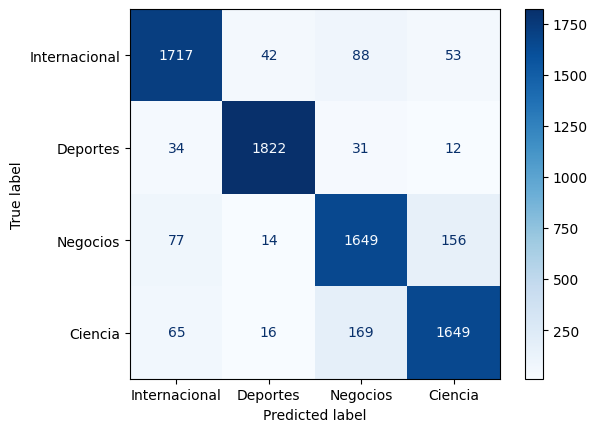

In [45]:
class_names = ["Internacional", "Deportes", "Negocios", "Ciencia"]
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

display = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plot.cm.Blues
)

In [46]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_pred,y_test,target_names=class_names  ))

238/238 [==============================] - 1s 4ms/step
               precision    recall  f1-score   support

Internacional       0.90      0.91      0.91      1893
     Deportes       0.96      0.96      0.96      1894
     Negocios       0.87      0.85      0.86      1937
      Ciencia       0.87      0.88      0.88      1870

     accuracy                           0.90      7594
    macro avg       0.90      0.90      0.90      7594
 weighted avg       0.90      0.90      0.90      7594



## Conclusiones

### Salazar Domínguez Jesús Eduardo



### Manzanares Peña Jorge Luis



### Salinas Romero Daniel



### Shen Shuai



## Referencias

- https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?select=train.csv

- https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map

- https://www.tensorflow.org/api_docs/python/tf/keras/Model

- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

- https://www.tensorflow.org/guide/keras/train_and_evaluate